In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
from ipywidgets import interact
import datetime
sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto import Kuramoto, plotting
# the above two lines are needed in order to see the modifications in python files without restarting vscode, 2 means that all modules will be reimported

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Parameters

N = 1000 # number of nodes
dt = 0.01 # time step
t_max = 150 # max time of the simulation
coupling = [0.0, 0.12, 0.15, 0.2] # coupling between oscillators (will be normalized by the number of interactions or max degree). 0.2 valore max
omega_f = 1 # frequence of the external field
coupling_ext = 0 # coupling between the oscillators and the external field. 1.7 valore max
sigma = 1 # sigma of the initial distribution of the frequencies (gaussian distribution), the mean is set at 0
t_eq = 300 #equilibration time
delta_t = t_max - t_eq

In [9]:
# Creation of the graph

#graph_nx = nx.complete_graph(N)
graph_nx1 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title1 = 'Erdos-Renyi' # in order to get average degree 6
graph_nx2 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title2 = 'Erdos-Renyi'

graph_nx = nx.watts_strogatz_graph(n = N, k = 5, p = 0.3)
#graph_nx2 = nx.barabasi_albert_graph(N, m = 3); title2 = 'Barabasi-Albert'
graph1 = nx.to_numpy_array(graph_nx1)
graph2 = nx.to_numpy_array(graph_nx2)

model1 = Kuramoto(coupling = coupling[0], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model2 = Kuramoto(coupling = coupling[1], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model3 = Kuramoto(coupling = coupling[2], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model4 = Kuramoto(coupling = coupling[3], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)

In [10]:
act_mat1 = model1.run(adj_mat = graph1).astype('float32') # shape is (n_nodes, t_step), every row is the temporal evolution of a node
ord1 = [Kuramoto.phase_coherence(vec) for vec in act_mat1.T]
print('End of the first run')
act_mat2 = model2.run(adj_mat = graph1).astype('float32') # shape is (n_nodes, t_step), every row is the temporal evolution of a node
ord2 = [Kuramoto.phase_coherence(vec) for vec in act_mat2.T]
print('End of the second run')
act_mat3 = model3.run(adj_mat = graph1).astype('float32') # shape is (n_nodes, t_step), every row is the temporal evolution of a node
ord3 = [Kuramoto.phase_coherence(vec) for vec in act_mat3.T]
print('End of the third run')
act_mat4 = model4.run(adj_mat = graph1).astype('float32') # shape is (n_nodes, t_step), every row is the temporal evolution of a node
ord4 = [Kuramoto.phase_coherence(vec) for vec in act_mat4.T]

End of the first run
End of the second run
End of the third run


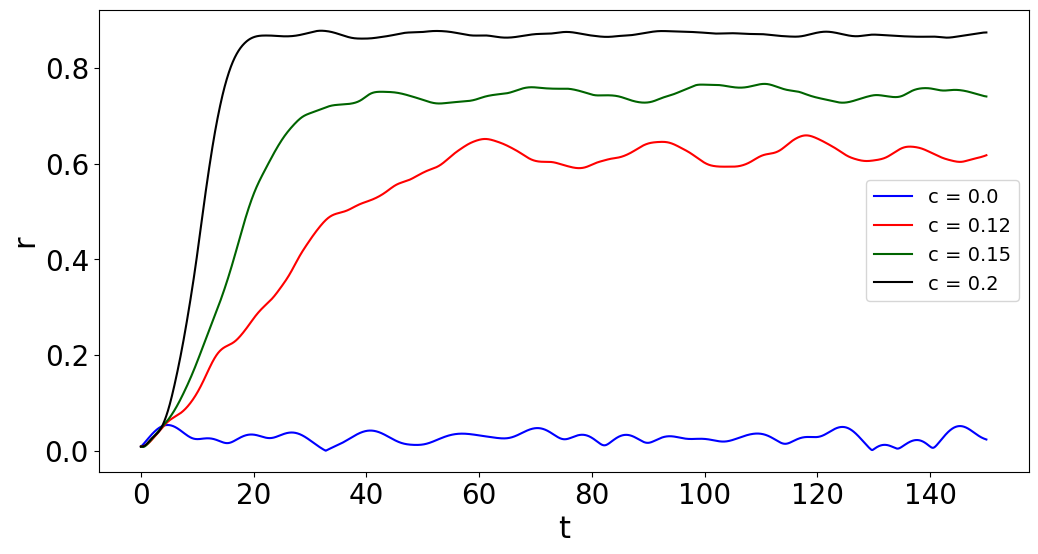

In [11]:
plotting.plot_many_r(ord1, ord2, ord3, ord4, dt, t_max, None, 'c', coupling)

In [12]:
# now_0 = datetime.datetime.now()
# print('Beginning of the simulation:', now_0, '\n')
# print('Coupling between oscillators:', coupling)
# print('External coupling:', coupling_ext)

# print('##########################################################')
# print(title1)
# print('Number of nodes', len(graph1))
# n_interactions1 = (graph1 != 0).sum(axis=0)  # number of incoming interactions
# print('Average degree', np.mean(n_interactions1))
act_mat1 = model.run(adj_mat = graph1).astype('float32') # shape is (n_nodes, t_step), every row is the temporal evolution of a node
ord1 = [Kuramoto.phase_coherence(vec) for vec in act_mat1.T]
# r_link1 = Kuramoto.r_link(graph1, act_mat1, delta_t, t_eq, dt)
# now1 = datetime.datetime.now()
# print('Elapsed time of numba without stack:', now1-now_0)

# now2 = datetime.datetime.now()
# act_mat1s = model.run1(adj_mat = graph1).astype('float32')
# print('Elapsed time of stack:', datetime.datetime.now()-now2)

# print('End of', title1, ', time of the simulation:', now1 - now_0)

# print('##########################################################')
# print(title2)
# print('Number of nodes', len(graph2))
# n_interactions2 = (graph2 != 0).sum(axis=0)  # number of incoming interactions
# print('Average degree', np.mean(n_interactions2))
act_mat2 = model2.run(adj_mat = graph2).astype('float32')
ord2 = [Kuramoto.phase_coherence(vec) for vec in act_mat2.T]
# r_link2 = Kuramoto.r_link(graph2, act_mat2, delta_t, t_eq, dt)

# now_f = datetime.datetime.now()
# print('End of', title2, ', time of the simulation:', datetime.datetime.now() - now1)
# print('End of the simulation:', now_f, '\n')
# print('Total time of the simulation', now_f - now_0, '\n')

NameError: name 'model' is not defined

<Axes: xlabel='t', ylabel='r'>

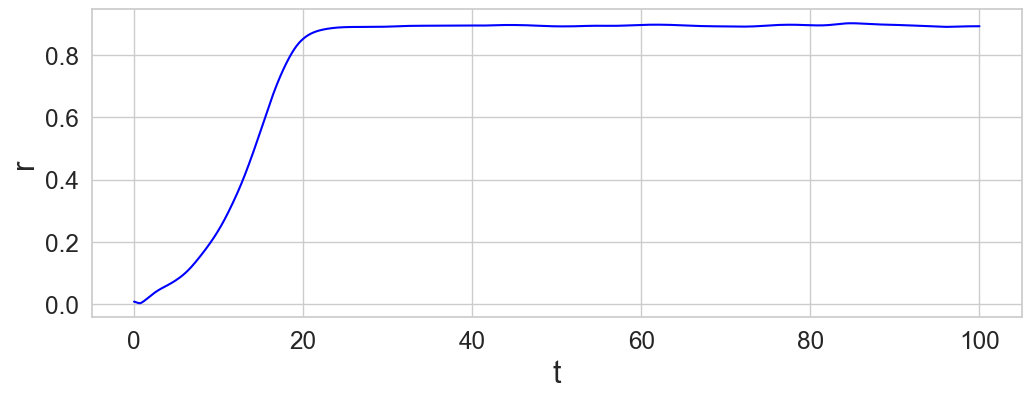

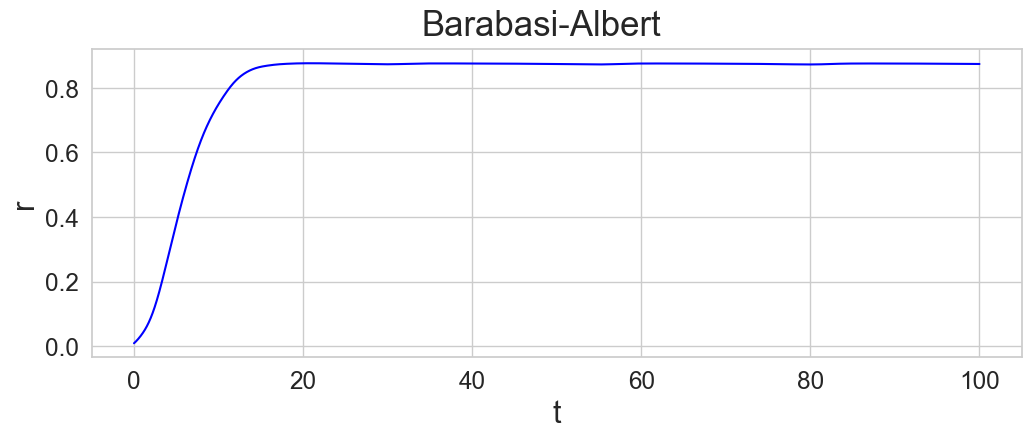

In [ ]:
# print('r_link ER:', r_link1)
# print('r_link BA:', r_link2)
# print('r ER:', np.mean(ord1[t_eq:]))
# print('r BA:', np.mean(ord2[t_eq:]))

#plotting.plot_activity(act_mat, dt, t_max)
plotting.plot_phase_coherence(ord1, dt, t_max, title = None)
plotting.plot_phase_coherence(ord2, dt, t_max, title = title2)

# plotting.plot_both(act_mat1, ord1, dt, t_max, title = 'Erdos-Renyi')
# plotting.plot_both(act_mat2, ord2, dt, t_max, title = 'Barabasi-Albert')

#plt.plot(np.linspace(0, t_max, int(t_max/dt)), ord)
#plt.show()
#plt.savefig(f'c_{coupling}b_{coupling_ext}sigma_{sigma}.png')